# Ejercicio 5.5

In [3]:
#install.packages('ISLR')
library('ISLR')

a) Se ajusto un modelo de regresion logistica multiple a los datos de observacion sin realizar una particion de los datos en datos de validacion y datos de prueba.

In [4]:
default.glm1 <- glm ( default ~ income + balance, family = "binomial", data = Default )
summary(default.glm1)


Call:
glm(formula = default ~ income + balance, family = "binomial", 
    data = Default)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4725  -0.1444  -0.0574  -0.0211   3.7245  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.154e+01  4.348e-01 -26.545  < 2e-16 ***
income       2.081e-05  4.985e-06   4.174 2.99e-05 ***
balance      5.647e-03  2.274e-04  24.836  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2920.6  on 9999  degrees of freedom
Residual deviance: 1579.0  on 9997  degrees of freedom
AIC: 1585

Number of Fisher Scoring iterations: 8


b) A continuacion se uso el enfoque del conjunto de validacion.

In [3]:
set.seed(1)
train2 = sample (10000, 5000)
default.glm2 <- glm ( default ~ income + balance, family = "binomial", data = Default, subset = train2 )
default.glm2.prob <- predict(default.glm2, Default[-train2,])
default.glm2.pred <- rep("No",5000)
default.glm2.pred[default.glm2.prob > 0.5 ] <-"Yes"
default.glm2.conf <- table(default.glm2.pred, Default[-train2,]$default)
default.glm2.conf
err2<-(default.glm2.conf[1,2] + default.glm2.conf[2,1])/5000
err2

                 
default.glm2.pred   No  Yes
              No  4815  124
              Yes   18   43

[1] 0.0284

c) Repetimos el proceso anterior para tres particiones distintas.

In [4]:
set.seed(2)
train3 = sample (10000, 5000)
default.glm3 <- glm( default ~ balance + income, family = "binomial", data = Default, subset = train3 )
default.glm3.prob <- predict(default.glm2, Default[-train3,])
default.glm3.pred <- rep("No",5000)
default.glm3.pred[default.glm3.prob > 0.5 ] <-"Yes"
default.glm3.conf <- table(default.glm3.pred, Default[-train3,]$default)
default.glm3.conf
err3<- (default.glm3.conf[1,2] + default.glm3.conf[2,1])/5000
err3

                 
default.glm3.pred   No  Yes
              No  4821  126
              Yes   10   43

[1] 0.0272

In [5]:
set.seed(3)
train4 = sample (10000, 5000)
default.glm4 <- glm( default ~ balance + income, family = "binomial", data = Default, subset = train4 )
default.glm4.prob <- predict(default.glm4, Default[-train4,])
default.glm4.pred <- rep("No",5000)
default.glm4.pred[default.glm4.prob > 0.5 ] <-"Yes"
default.glm4.conf <- table(default.glm4.pred, Default[-train4,]$default)
default.glm4.conf
err4<-(default.glm4.conf[1,2] + default.glm4.conf[2,1])/5000
err4

                 
default.glm4.pred   No  Yes
              No  4837  120
              Yes    7   36

[1] 0.0254

In [6]:
set.seed(4)
train5 = sample (10000, 5000)
default.glm5 <- glm( default ~ balance + income, family = "binomial", data = Default, subset = train5 )
default.glm5.prob <- predict(default.glm5, Default[-train5,])
default.glm5.pred <- rep("No",5000)
default.glm5.pred[default.glm5.prob > 0.5 ] <-"Yes"
default.glm5.conf <- table(default.glm5.pred, Default[-train5,]$default)
default.glm5.conf
err5 <-(default.glm5.conf[1,2] + default.glm5.conf[2,1])/5000
err5
ini <-c(err2,err3,err4,err5)

                 
default.glm5.pred   No  Yes
              No  4823  129
              Yes    9   39

[1] 0.0276

Vemos que al cambiar el conjunto de validacion, tambien cambia el error de validacion.

d) Finalmente agregamos una nueva variable NumericStudent que sea 1 si el campo Student es Yes y 0 de lo contrario. Para evaluar el efecto de agregar esta variable al modelo se hizo el calculo del error del modelo usando las mismas particiones que para el literal anterior.

In [7]:
Default$numstudent <- 0
Default$numstudent[Default$student == "Yes"] <-1
default.glm2 <- glm( default ~ income + balance+numstudent, family = "binomial", data = Default, subset = train2 )
default.glm2.prob <- predict(default.glm2, Default[-train2,])
default.glm2.pred <- rep("No",5000)
default.glm2.pred[default.glm2.prob > 0.5 ] <-"Yes"
default.glm2.conf <- table(default.glm2.pred, Default[-train2,]$default)
default.glm2.conf
err2<-(default.glm2.conf[1,2] + default.glm2.conf[2,1])/5000

                 
default.glm2.pred   No  Yes
              No  4817  126
              Yes   16   41

In [8]:
default.glm3 <- glm( default ~ balance + income+numstudent, family = "binomial", data = Default, subset = train3 )
default.glm3.prob <- predict(default.glm2, Default[-train3,])
default.glm3.pred <- rep("No",5000)
default.glm3.pred[default.glm3.prob > 0.5 ] <-"Yes"
default.glm3.conf <- table(default.glm3.pred, Default[-train3,]$default)
default.glm3.conf
err3<-(default.glm3.conf[1,2] + default.glm3.conf[2,1])/5000

                 
default.glm3.pred   No  Yes
              No  4820  128
              Yes   11   41

In [9]:
default.glm4 <- glm( default ~ balance + income+ numstudent, family = "binomial", data = Default, subset = train4 )
default.glm4.prob <- predict(default.glm4, Default[-train4,])
default.glm4.pred <- rep("No",5000)
default.glm4.pred[default.glm4.prob > 0.5 ] <-"Yes"
default.glm4.conf <- table(default.glm4.pred, Default[-train4,]$default)
default.glm4.conf
err4<-(default.glm4.conf[1,2] + default.glm4.conf[2,1])/5000

                 
default.glm4.pred   No  Yes
              No  4837  122
              Yes    7   34

In [10]:
default.glm5 <- glm( default ~ balance + income+numstudent, family = "binomial", data = Default, subset = train5 )
default.glm5.prob <- predict(default.glm5, Default[-train5,])
default.glm5.pred <- rep("No",5000)
default.glm5.pred[default.glm5.prob > 0.5 ] <-"Yes"
default.glm5.conf <- table(default.glm5.pred, Default[-train5,]$default)
default.glm5.conf
err5<-(default.glm5.conf[1,2] + default.glm5.conf[2,1])/5000
fin <-c(err2,err3,err4,err5)

                 
default.glm5.pred   No  Yes
              No  4823  127
              Yes    9   41

La siguiente grafica compara los errores obtenidos por particion sin incluir la variable student ("Modelo 1") e incluyendola (Modelo 2).

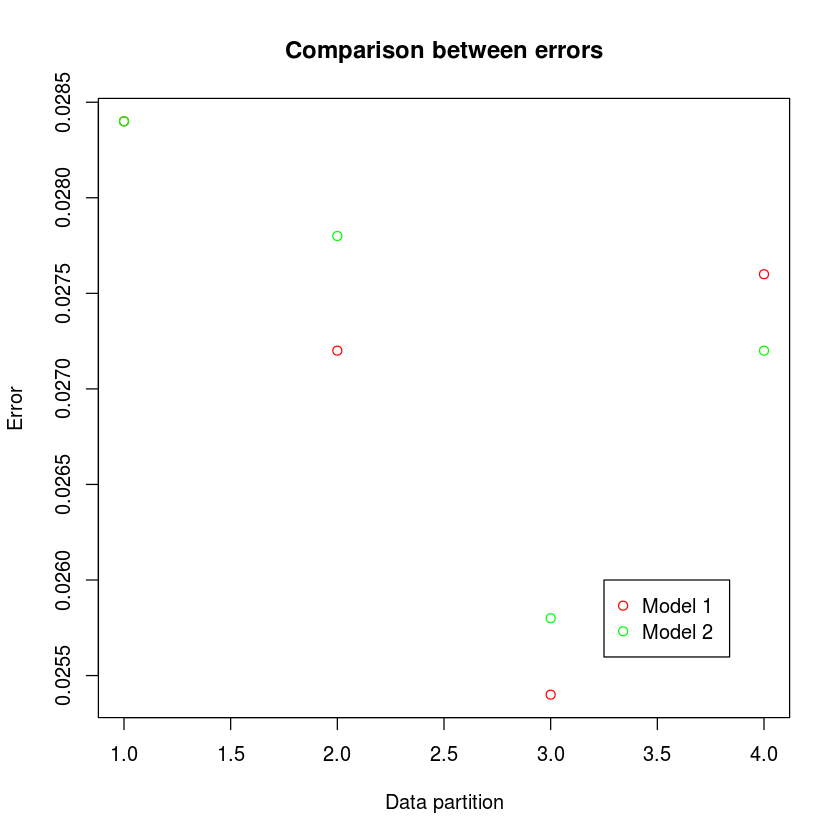

In [11]:
plot(1:4,ini,col = 'red',main = "Comparison between errors" , ylab = "Error",xlab = "Data partition")
points(1:4,fin,col ='green')
legend(3.25,0.0260,c("Model 1", "Model 2"),pch = c(1,1), col = c("red","green"))

En ela grafica vemos que la inclusion de la variable dummy de student no tiene un impacto muy significativo sobre el error. Para la particion 2 y 3 es mejor el modelo 1 mientras que para otros es mejor el modelo 2.

# Ejercicio 6.10

a) Los datos se generaron a partir de una distribucion uniforme entre 0 y 10.

In [12]:
install.packages('leaps')
library('leaps')

Warning message in install.packages("leaps"):
“installation of package ‘leaps’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [13]:
set.seed(1)
datavector <- runif(20000,0,10)
names <-c("var1","var2","var3","var4","var5","var6","var7","var8","var9","var10","var11","var12","var13","var14","var15","var16","var17","var18","var19","var20")
mat <- matrix(datavector,ncol = 20, nrow = 1000, dimnames = list(NULL, names))
data <- as.data.frame.matrix(mat)
noise <- rnorm(1000)
data$y <- data$var1-data$var2-data$var4 + data$var9 -data$var10 +data$var13 - data$var16 + data$var17 -data$var18 -data$var20+noise
data

var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,⋯,var12,var13,var14,var15,var16,var17,var18,var19,var20,y
2.6550866,5.30808793,8.7180502,8.0234954,1.8776846,0.3549953,7.70081393,6.9867717,1.2826515,9.4037788,⋯,1.27587422,2.6801514,8.1251136,0.9251632,2.1336393,6.0399576,8.38937637,1.1177927,9.0286283,-30.4334905
3.7212390,6.84860904,9.6719705,4.7949519,5.0475902,3.5570365,6.90262529,4.5474333,1.2769152,9.9676557,⋯,2.06983423,1.0177984,9.2434055,4.4674406,9.6935704,9.7408409,0.29608795,0.7662839,6.5026099,-23.4032168
5.7285336,3.83283394,8.6691627,1.7740156,0.2728685,2.4887294,6.50477059,6.4712197,7.7773234,2.3291001,⋯,1.70596548,1.3362410,3.5285346,8.2944637,7.2777071,2.0342439,4.73515579,1.7201583,0.7669257,-4.8747922
9.0820779,9.54987998,4.3771530,3.9713334,4.9629785,8.7918038,0.74655963,6.1379283,4.2015036,1.4190118,⋯,6.25107258,7.9935258,4.7785613,8.1237396,3.4396353,0.2060101,9.47992831,8.4205713,5.3550028,-12.9172346
2.0168193,1.18356581,1.9193779,8.1422699,9.4735171,3.1797888,9.02580662,2.6642584,7.1590193,0.6629701,⋯,9.47304276,0.1499073,5.4541313,8.0510669,1.4401177,0.7192066,6.01786430,5.3641651,5.9591487,-13.8614235
8.9838968,0.39100055,0.8229440,9.4135708,3.8118213,3.2112050,1.32939633,9.2752334,1.5330411,7.3284453,⋯,9.32508736,7.0540594,8.7838715,3.8592807,1.3855752,5.6937146,6.08251915,5.1098781,4.7179595,-6.5793473
9.4467527,5.04505033,5.8345164,1.7334993,6.9821373,8.4788795,2.10826044,2.8345421,0.8823663,2.8542945,⋯,5.66635032,4.8751392,0.4233232,8.5560740,8.4594610,9.5390822,2.67150643,7.5845809,4.1656044,-0.4885087
6.6079779,5.78482555,0.7036150,3.5494080,6.8876581,3.8127038,1.55160398,8.3871762,2.0502694,7.1948850,⋯,7.31244322,9.6911470,9.9535543,7.1462360,5.7141117,5.5922812,6.43633556,2.5284973,5.9870458,-10.2529680
6.2911404,8.39303908,5.2766266,7.0504004,4.7773068,2.7512432,0.54508663,6.2267015,0.2118409,0.1766945,⋯,1.81892147,3.9727821,7.7146754,3.6295025,5.7048544,0.6125490,2.18740891,7.4966069,5.3193650,-17.9918338
0.6178627,6.54444975,4.7228829,9.5924092,2.7334761,9.1794350,7.14766437,7.1290665,5.9540149,1.7320589,⋯,4.43485653,6.7166595,6.3262065,2.3458759,4.8569791,9.4208867,1.29510654,1.6453300,1.2334218,-1.2856834


b) Se extrajo una muestra aleatoria de 100 datos como los datos de entrenamiento.

In [14]:
set.seed(1)
train <- sample(1000,100)

c) A continuacion se implemento la primera parte del algoritmo de mejor subconjunto.

In [15]:
regfit.full <- regsubsets(y~., data[train,],nvmax = 20)
reg.summary <- summary(regfit.full)
reg.summary

Subset selection object
Call: regsubsets.formula(y ~ ., data[train, ], nvmax = 20)
20 Variables  (and intercept)
      Forced in Forced out
var1      FALSE      FALSE
var2      FALSE      FALSE
var3      FALSE      FALSE
var4      FALSE      FALSE
var5      FALSE      FALSE
var6      FALSE      FALSE
var7      FALSE      FALSE
var8      FALSE      FALSE
var9      FALSE      FALSE
var10     FALSE      FALSE
var11     FALSE      FALSE
var12     FALSE      FALSE
var13     FALSE      FALSE
var14     FALSE      FALSE
var15     FALSE      FALSE
var16     FALSE      FALSE
var17     FALSE      FALSE
var18     FALSE      FALSE
var19     FALSE      FALSE
var20     FALSE      FALSE
1 subsets of each size up to 20
Selection Algorithm: exhaustive
          var1 var2 var3 var4 var5 var6 var7 var8 var9 var10 var11 var12 var13
1  ( 1 )  " "  " "  " "  "*"  " "  " "  " "  " "  " "  " "   " "   " "   " "  
2  ( 1 )  " "  " "  " "  "*"  " "  " "  " "  " "  " "  " "   " "   " "   "*"  
3  ( 1 )  " "  " " 

[1] 59.5493789 50.2405588 42.4194670 35.2130461 29.0354628 22.5571244
 [7] 17.8054905 12.8163144  7.0897975  0.6333704  0.6003667  0.5901936
[13]  0.5825307  0.5776217  0.5744227  0.5729580  0.5726938  0.5725913
[19]  0.5725709  0.5725669

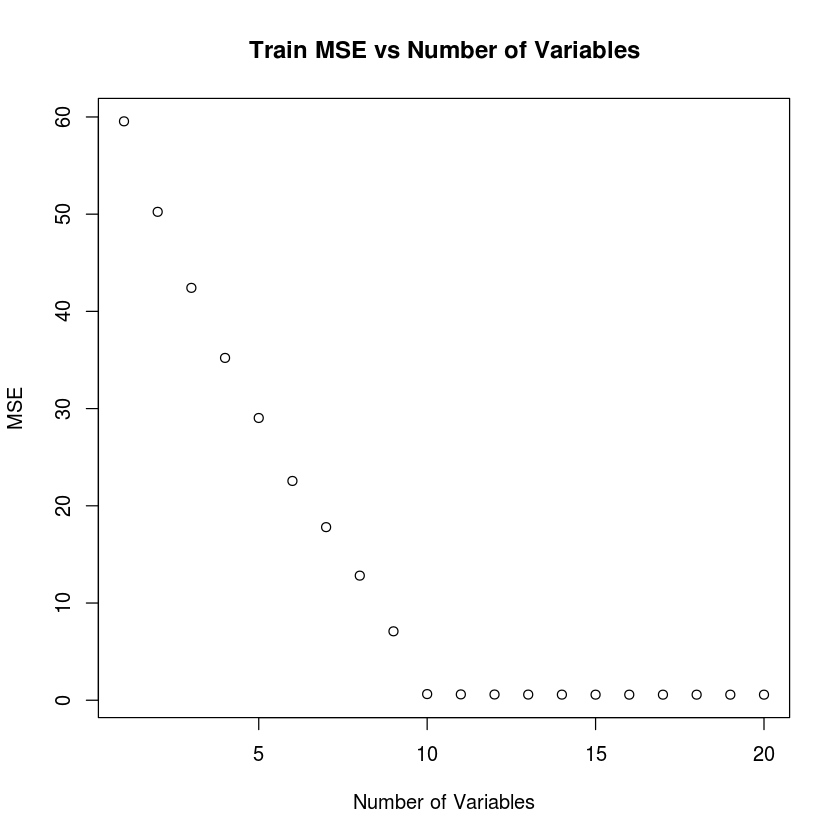

In [16]:
err <- reg.summary$rss/100
err
plot(1:20,err, main="Train MSE vs Number of Variables" , xlab = 'Number of Variables', ylab = 'MSE')

Vemos en la grafica anterior que entre mayor es el numero de variables menor es el MSE. Sin embargo, desde n = 10 la reduccion en el error se vuelve menos significativa.

d) A continuacion se calcula el MSE para los modelos de diferentes tamanios.

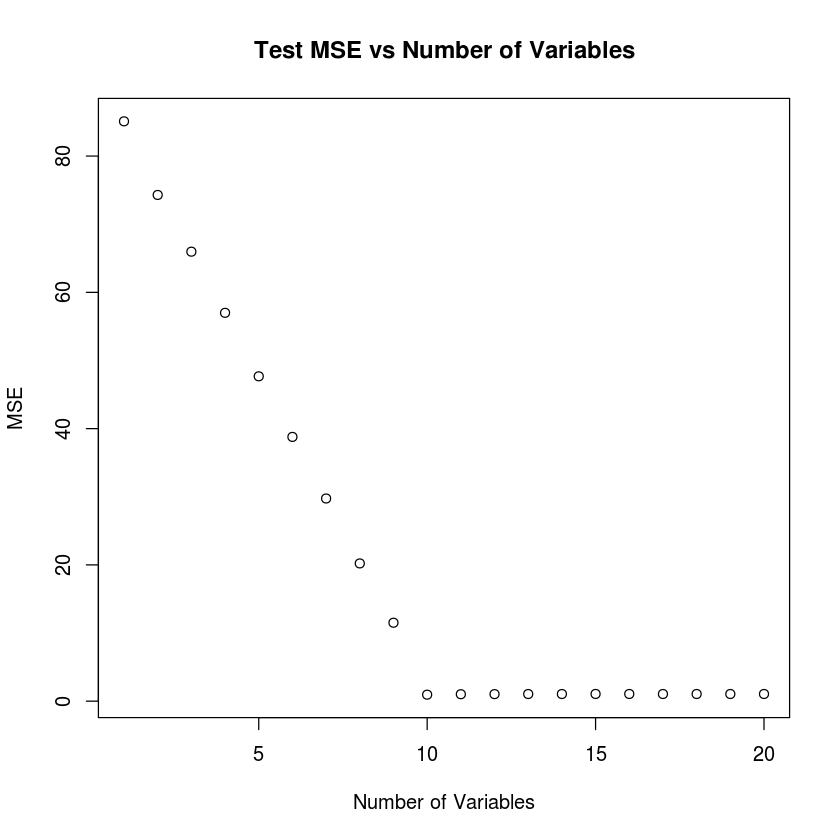

In [17]:
test.mat = model.matrix(y~.,data=data[-train,])
val.errors = rep(NA,20)
for(i in 1:20){
    coefi = coef(regfit.full,id = i)
    pred = test.mat[,names(coefi)]%*%coefi
    val.errors[i]= mean((data$y[-train]-pred)^2)
}
plot(1:20,val.errors, main="Test MSE vs Number of Variables" , xlab = 'Number of Variables', ylab = 'MSE')

e) Vemos que el mejor MSE para los datos de pruebas se alcanza precisamente cuando n=10. Dado que lo alcanza en un valor intermedio no es necesario modificar los datos generados. Vemos nuevamente el codo de la grafica en 10, lo cual es consistente pues el modelo original tenia 10 variables distintas de cero.

f) A continuacion obtenemos los coeficientes del mejor modelo.

In [18]:

coefimat = matrix(rep(0,20),dimnames = list(names=names,NULL),nrow=20,ncol=1)

coefi <- coef(regfit.full, id =10)[-1]
coefimat[names(coefi),]= coefi
coefimat

var1,0.9864794
var2,-0.9692785
var3,0.0000000
var4,-1.0251095
var5,0.0000000
var6,0.0000000
var7,0.0000000
var8,0.0000000
var9,0.9808603
var10,-1.0084216
var11,0.0000000


Vemos que con respecto al modelo original, el modelo obtenido mendiante regresion se ajusta bastante bien. 

g) A continuacion se construyo un metodo para evaluar la distancia entre los coeficiente reales y los coeficientes predecidos.

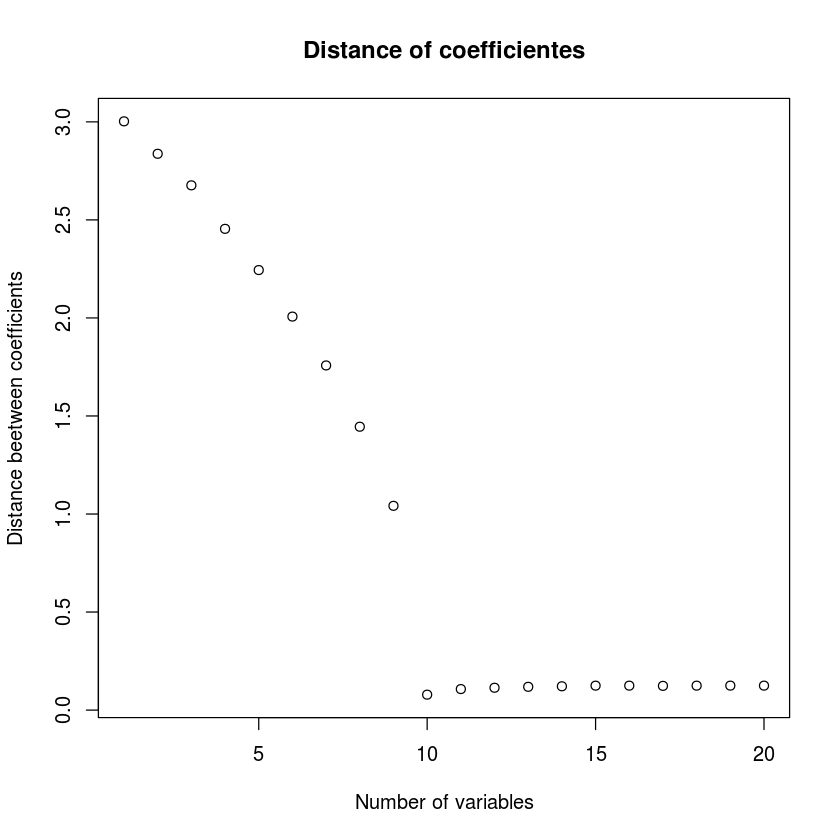

In [19]:
names <-c("var1","var2","var3","var4","var5","var6","var7","var8","var9","var10","var11","var12","var13","var14","var15","var16","var17","var18","var19","var20")
real.val <- matrix(c(1,-1,0,-1,0,0,0,0,1,-1,0,0,1,0,0,-1,1,-1,0,-1),dimnames = list(names=names,NULL),nrow =20,ncol=1)
difcoef <- rep(NA,20)
for( i in 1:20){
        coefimat = matrix(rep(0,20),dimnames = list(names=names,NULL),nrow=20,ncol=1)
        coefi <- coef(regfit.full, id = i)[-1]
        coefimat[names(coefi),]= coefi
        difcoef[i] <- sum((real.val-coefimat)^2)
}
difcoef <- sqrt(difcoef)
plot(1:20, difcoef, main = "Distance of coefficientes", xlab = "Number of variables", ylab = "Distance beetween coefficients")

En la grafica anterior podemos ver de forma mas clara como el modelo que mejor se ajusta es el de n = 10. Vemos que para n < 10 esta metrica es decreciente. Esto tiene sentido pues al agregar una nueva variable aumenta la precision del modelo. Luego la metrica aumenta para valores de n > 10. Esto a su vez es interpretable pues una vez se alcanzan las variables que forman el modelo original, agregar una nueva variable simplemente aumenta la complejidad que el modelo deberia tener. En la grafica se puede apreciar la misma forma de codo que en la grafica anterior.

# Ejercicio 7.6

   a) Probamos regresiones polinomiales de varios grados y calculamos el error de validacion cruzada para determinar el mejor grado.

In [20]:
library(boot)
library(ISLR)

[1] 1675.837 1599.785 1595.300 1594.983 1595.445 1595.028 1595.382 1595.699
 [9] 1593.793 1594.323 1594.888 1596.552 1596.944 1597.557 1598.330 1599.525
[17] 1601.012 1602.886 1604.761 1606.992

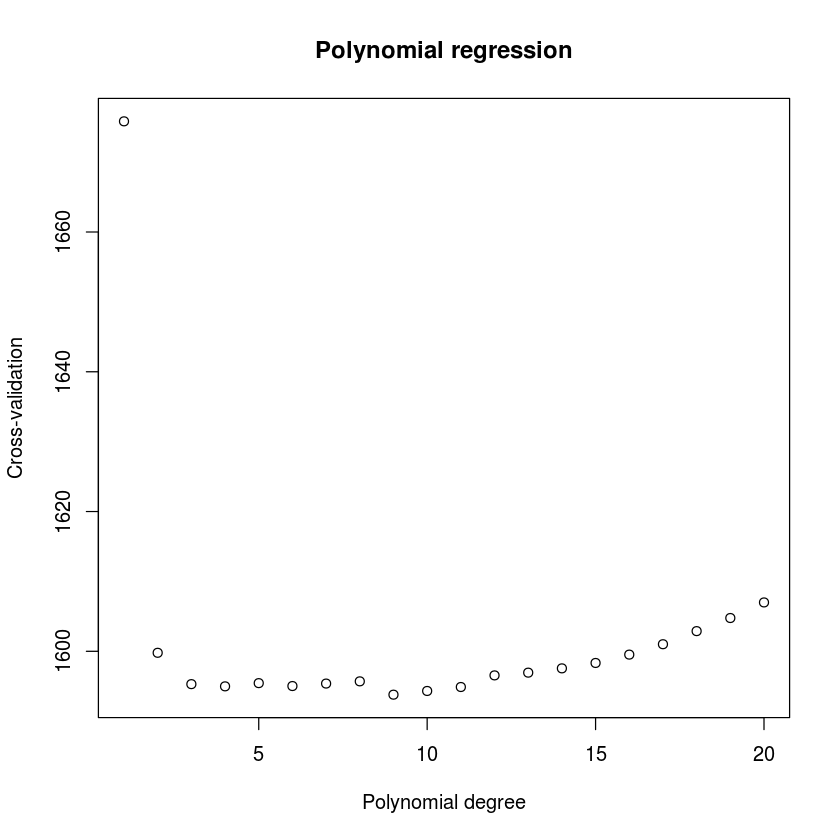

In [21]:

error = rep(0,10)
for (i in 1:20){
    glm.fit = glm(wage~poly(age,i), data = Wage)
    set.seed(1)
    error[i] = cv.glm(Wage,glm.fit, K = 10)$delta[1]
}
error
plot(1:20,error, main = "Polynomial regression", xlab = "Polynomial degree",ylab = "Cross-validation")

Podemos ver de la grafica que el grado con menor error en la validacion cruzada es d = 4. Esto es consistente con los resultados del ANOVA que sugieren que el mejor modelo puede ser una cubico o cuartico. A continuacion, se grafican los datos de Wage y Age y la linea de regresion polinomial cuartica.

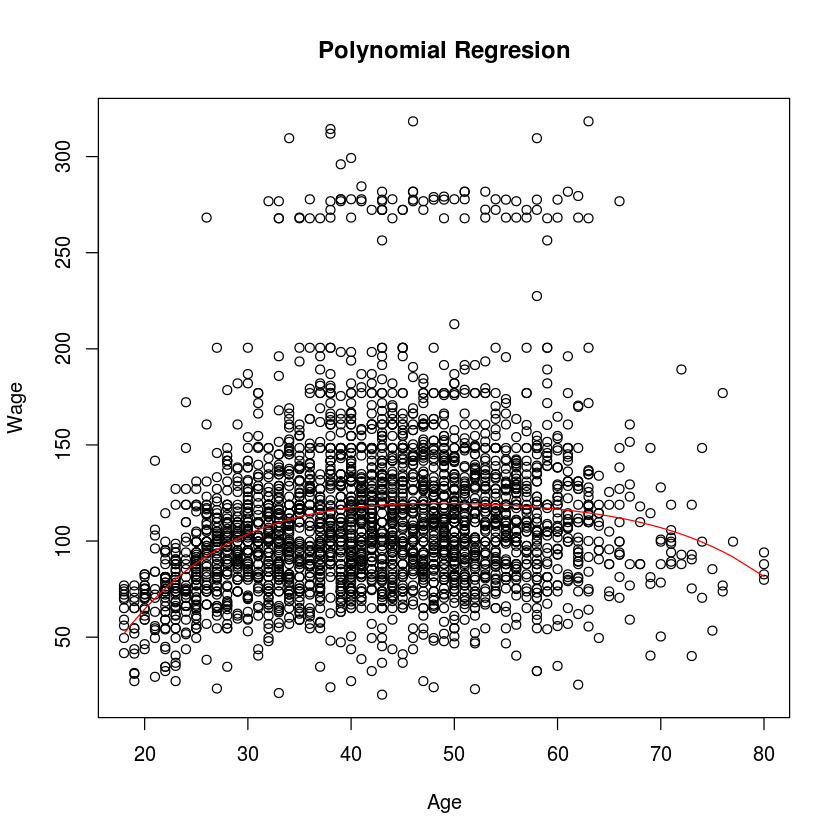

In [22]:
plot(Wage$age, Wage$wage, main = "Polynomial Regresion", ylab="Wage",xlab="Age")
glm.fit = glm(wage~poly(age,4), data = Wage)
lines(sort(Wage$age),fitted(glm.fit)[order(Wage$age)],col = "red")

b) A continuacion usamos las funciones a trozos para hacer un modelo de prediccion de los datos de Wage a partir de Age.

[1] 1733.968 1683.398 1639.253 1631.339 1623.162 1612.098 1600.689 1611.707
[9] 1605.738

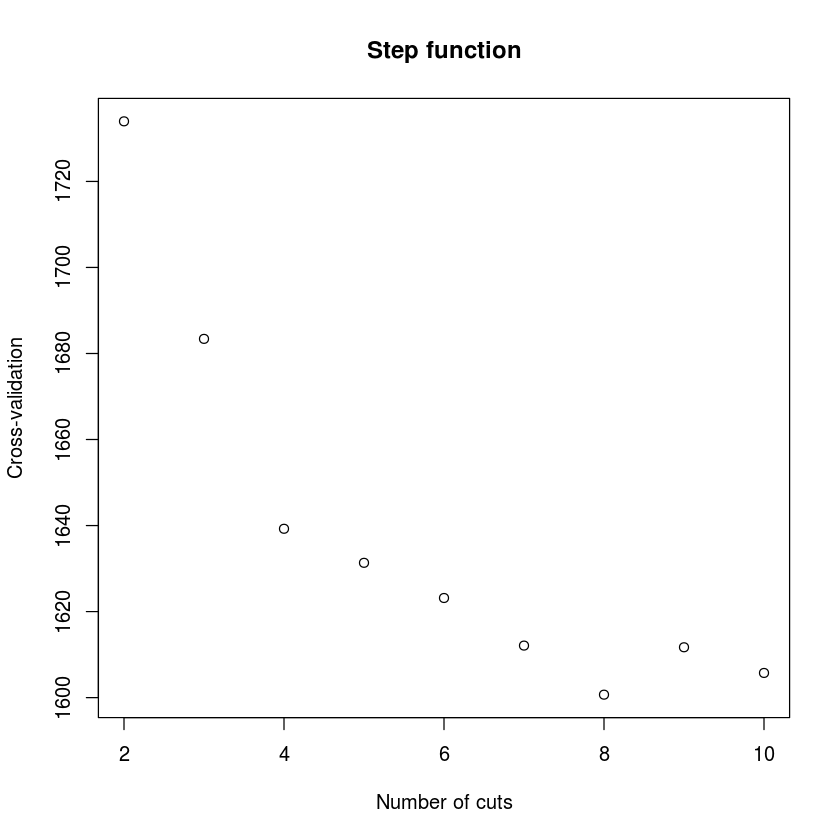

In [23]:
set.seed(1)
error = rep(0,9)
for (i in 2:10){
    Wage$age.cut <- cut(Wage$age, i)
    glm.fit <- glm(wage~age.cut,data = Wage)
    error[i-1] = cv.glm(Wage,glm.fit, K = 10)$delta[1]
}
error
plot(2:10,error, main = "Step function", xlab = "Number of cuts",ylab = "Cross-validation")

El error se minimiza para 8 cortes. Por lo tanto seleccionamos ese modelo.

# Ejercicio 8.8

In [24]:
install.packages("tree")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [25]:
library(tree)
library(randomForest)
library(ISLR)

randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.


__(a)__ Después de instalar los paquetes necesarios para el ejercicio, cargamos la data de _carseats_ y creamos partimos los datos en dos muestras:

1. Muestra de Entrenamiento.
2. Muestra de Prueba.

Cada una de tamaño $200$ (y fueron seleccionadas de manera aleatoria usando la semilla $1$).

In [26]:
carseats = Carseats
attach(Carseats)


set.seed(1)
train = sample(1:nrow(carseats), 200)
carseats.train = carseats[train,]
carseats.test = carseats[-train,]

__(b)__ Para esta parte hacemos una regresión (de tipo árbol) de Sales como respuesta y las otras variables como  predictores.

Luego de esto vamos a graficar el arbol resultante y a comentar sobre lo que nos devolvió el resumen del árbol.

y despues vamos al calcular con la muestra de prueba el $MSE$ del árbol.


Regression tree:
tree(formula = Sales ~ ., data = carseats.train)
Variables actually used in tree construction:
[1] "ShelveLoc"   "Price"       "Age"         "Advertising" "Income"     
[6] "CompPrice"  
Number of terminal nodes:  18 
Residual mean deviance:  2.36 = 429.5 / 182 
Distribution of residuals:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-4.2570 -1.0360  0.1024  0.0000  0.9301  3.9130 

[1] 4.148897

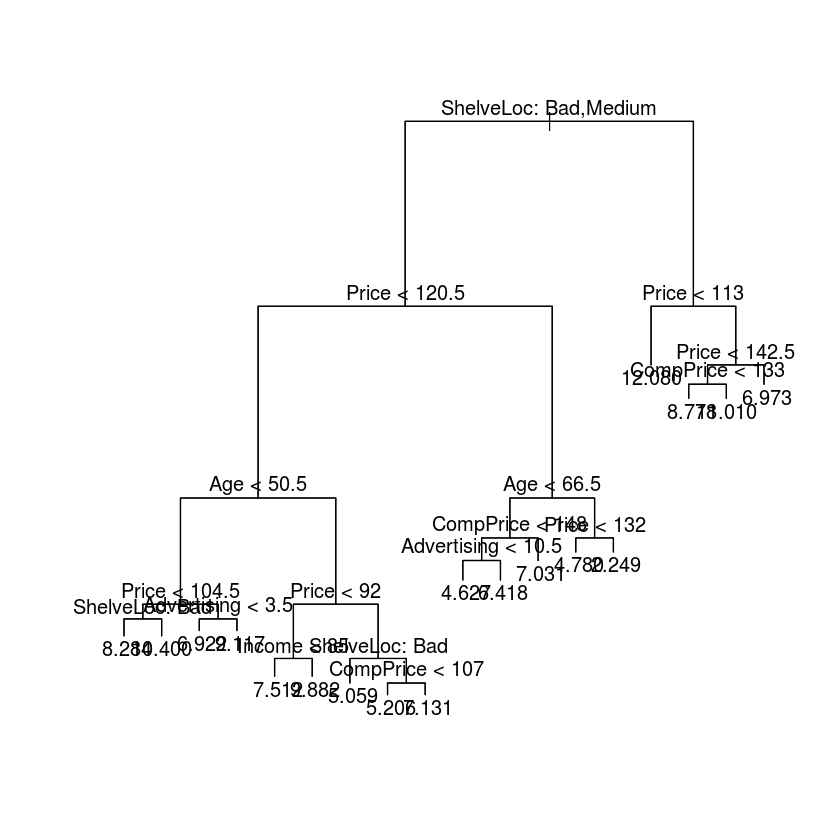

In [27]:
tree = tree(Sales ~ ., data = carseats.train)
summary(tree)

plot(tree) ; text(tree, pretty = 0)

predictstest = predict(tree, carseats.test) 
mse= mean((carseats.test$Sales  - predictstest)^2)
mse

Las variables consideradas en la construcción del árbol fueron: $SheveLoc$, $Price$, $Age$, $Advertising$, $Income$ y $CompPrice$.

El árbol resultante tiene 18 nodos.

El error cuadrático medio del árbol es $MSE_{Tree}\approx 4.148$.

__(c)__ Hacemos Validación Cruzada en el árbol para encontrar el nivel óptimo de complejidad del árbol.
(Sin olvidar fijar la semilla)

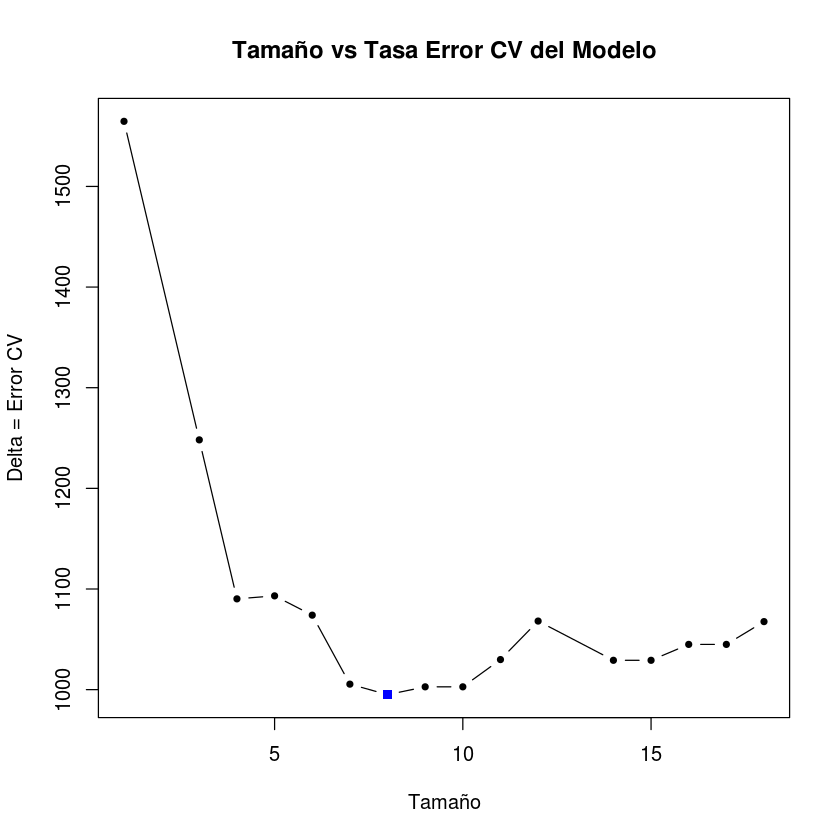

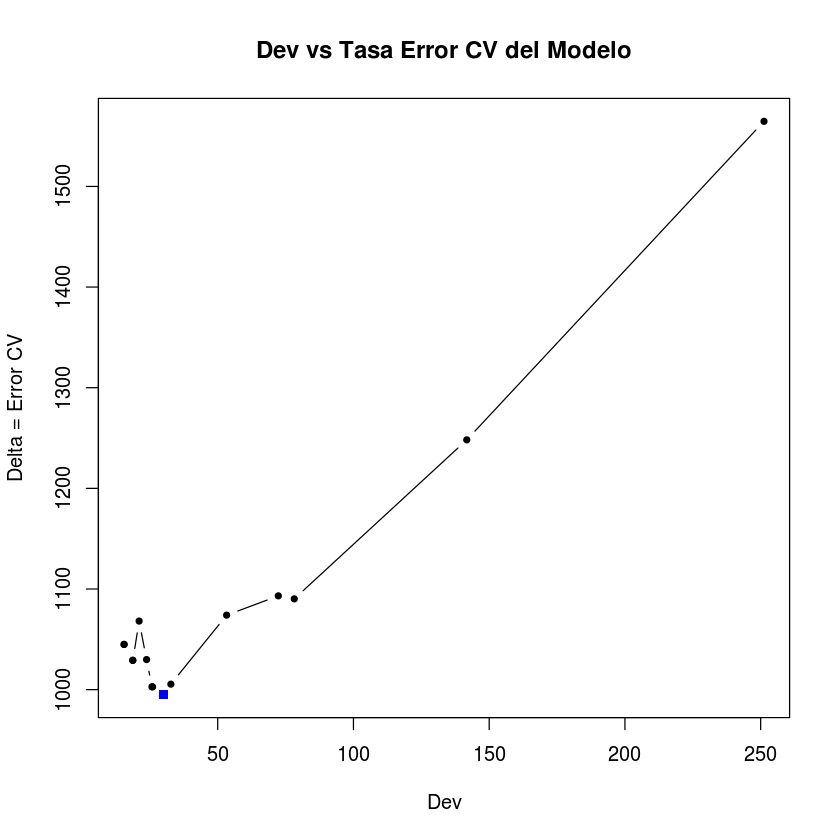

[1] 5.09085

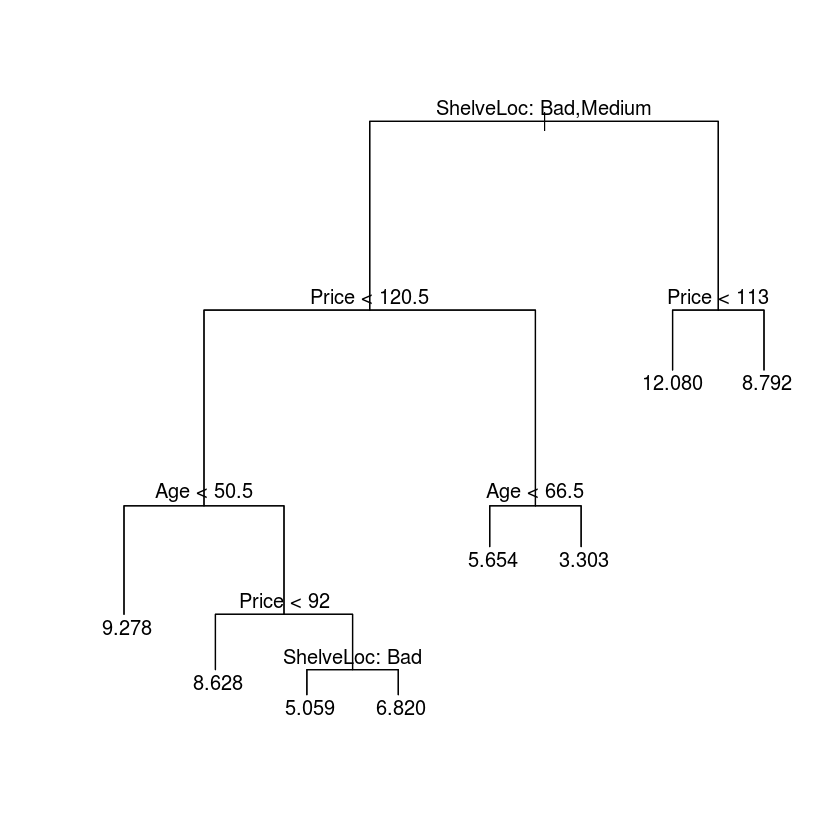

In [28]:
set.seed(100)
cv = cv.tree(tree, FUN = prune.tree)
plot(cv$size, cv$dev,xlab = "Tamaño", 
     main="Tamaño vs Tasa Error CV del Modelo" ,
     ylab = "Delta = Error CV", pch = 20, type = "b")
points(cv$size[which.min(cv$dev)], cv$dev[which.min(cv$dev)],
       pch = 15, col = "blue", lwd = 7)

plot(cv$k, cv$dev,xlab = "Dev", 
     main="Dev vs Tasa Error CV del Modelo" ,
     ylab = "Delta = Error CV", pch = 20, type = "b")
points(cv$k[which.min(cv$dev)], cv$dev[which.min(cv$dev)],
       pch = 15, col = "blue", lwd = 7)

prunedtree = prune.tree(tree, best = 8)
plot(prunedtree)
text(prunedtree, pretty = 0)

predictprun = predict(prunedtree, carseats.test)
mseprun = mean((carseats.test$Sales - predictprun)^2)
mseprun


Podemos ver en la Gráfica 1 que el tamaño que produce el mínimo error CV es $8$. 

Así que podamos al árbol (con el nivel óptimo de complejidad del árbol que es $8$). 

Graficamos y examinamos el $MSE_{Tree}^{Pruned}\approx 5.09$.

Por lo cual podemos afirmar que no, el podar el árbol no mejor el $MSE$ (es decir que lo haga menor).

__(d)__ Ahora hacemos el método del embolsado (que usa con el comando $randomForest$ con $mtry=p$ el número de feuatures). 

y examinamos el error cuadrático de este método.

(sin olvidar fijar la semilla)

In [29]:
set.seed(100)
bag = randomForest(Sales ~ ., data = carseats.train, mtry = 10,  
                            importance = T)
bagpredict = predict(bag, carseats.test)
msebag = mean((carseats.test$Sales - bagpredict)^2)
msebag

importance(bag)


[1] 2.565602

,%IncMSE,IncNodePurity
CompPrice,16.1043751,135.066939
Income,4.3028197,73.512953
Advertising,13.7475613,125.617260
Population,0.5832750,60.344147
Price,58.7868928,529.982201
ShelveLoc,45.4962273,324.484582
Age,21.3036845,178.599245
Education,0.5020735,41.700971
Urban,-3.2771020,9.322239
US,5.3196744,14.706001


Tenemos que $MSE_{Baging}\approx 2.56$, lo cual nos dice que usar este método si mejora el $MSE$ resultante en la muestra de prueba con respecto a los anteriores métodos. 

Los predictores más importantes son:

1. $Price$ (Importancia de $58.78$%).
2. $SheveLoc$ (Importancia de $45.49$%).
3. $Age$ (Importancia de $21.03$%).
4. $CompPrice$ (Importancia de $16.01$%).
5. $Advertising$ (Importancia de $13.74$%).

__(e)__  Ahora hacemos el método de random forest (usando $mtry=\frac{p}{2}$ con $p$ el número de feuatures). 

y examinamos el error cuadrático de este método.

(sin olvidar fijar la semilla)

In [30]:
set.seed(100)
randfor = randomForest(Sales ~ ., data = carseats.train, mtry=5 , 
                           importance = T)
randforpredict = predict(randfor,  carseats.test)
randformse = mean((carseats.test$Sales - randforpredict)^2)
randformse


importance(randfor)


mses=rep(0,9)
for(i in 1:9){
  set.seed(100)
  randfor = randomForest(Sales ~ ., data = carseats.train, mtry=i  , 
                         importance = T)
  randforpredict = predict(randfor,  carseats.test)
  mses[i] = mean((carseats.test$Sales - randforpredict)^2)
}

mses


[1] 2.862337

,%IncMSE,IncNodePurity
CompPrice,11.98572291,127.22061
Income,6.06610269,99.36818
Advertising,13.97378296,140.01627
Population,-0.01139302,80.02870
Price,47.00338689,448.41974
ShelveLoc,37.76072961,268.01935
Age,18.74382842,197.12347
Education,1.76502194,54.71611
Urban,-1.78829583,12.03256
US,6.22566167,21.25359


[1] 5.267765 3.802033 3.340038 3.014196 2.862337 2.723114 2.605577 2.602777
[9] 2.576043

Tenemos que $MSE_{RandomF}\approx 2.86$, lo cual nos dice que usar este método si mejora el $MSE$ resultante en la muestra de prueba con respecto a los métodos de Arbol y Arbol Podado pero no con respecto al método de Baging. 

Los predictores más importantes son:

1. $Price$ (Importancia de $47$%).
2. $SheveLoc$ (Importancia de $37.76$%).
3. $Age$ (Importancia de $18.74$%).
4. $Advertising$ (Importancia de $13.97$%).
5. $CompPrice$ (Importancia de $11.98$%).

Vemos que cuando vamos variando $m$, a medidad que este sube tenemos que el $MSE$ disminuye. 

Así que:

$$ m  \:\: \uparrow \:\:\: \Rightarrow  \:\:\: MSE \:\:\downarrow $$


# Ejercicio 8.11

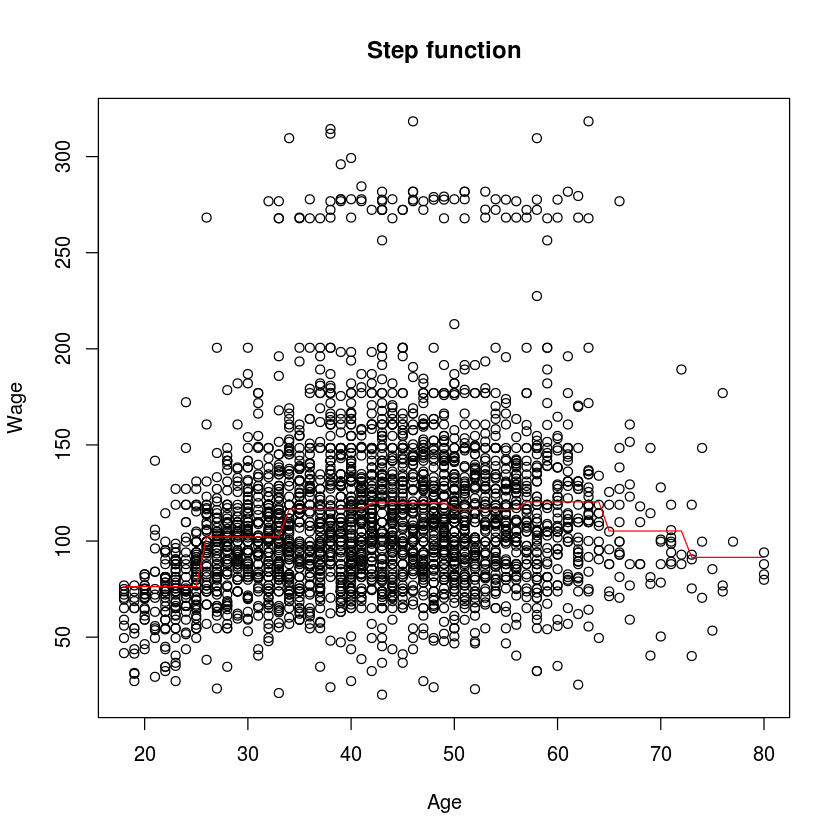

In [31]:
plot(Wage$age, Wage$wage, main = "Step function", ylab="Wage",xlab="Age")
Wage$age.cut <- cut(Wage$age, 8)
glm.fit <- glm(wage~age.cut,data = Wage)
lines(sort(Wage$age),fitted(glm.fit)[order(Wage$age)],col = "red")

a) Se tomo como conjunto de entrenamiento las primeras mil observaciones del dataset.

In [32]:
train = 1:1000

A continuacion se uso el algoritmo de boosting para ajustar mil arboles a los datos de entrenamiento.

In [33]:
install.packages("gbm")
library(gbm)
attach(Caravan)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Loading required package: survival

Attaching package: ‘survival’

The following object is masked from ‘package:boot’:

    aml

Loading required package: lattice

Attaching package: ‘lattice’

The following object is masked from ‘package:boot’:

    melanoma

Loading required package: splines
Loading required package: parallel
Loaded gbm 2.1.3


Warning message in gbm.fit(x, y, offset = offset, distribution = distribution, w = w, :
“variable 50: PVRAAUT has no variation.”Warning message in gbm.fit(x, y, offset = offset, distribution = distribution, w = w, :
“variable 71: AVRAAUT has no variation.”

,var,rel.inf
PPERSAUT,PPERSAUT,14.6350478
MKOOPKLA,MKOOPKLA,9.4709165
MOPLHOOG,MOPLHOOG,7.3145742
MBERMIDD,MBERMIDD,6.0865197
PBRAND,PBRAND,4.6676612
MGODGE,MGODGE,4.4946326
ABRAND,ABRAND,4.3242776
MINK3045,MINK3045,4.1759062
MOSTYPE,MOSTYPE,2.8640258
PWAPART,PWAPART,2.7819107


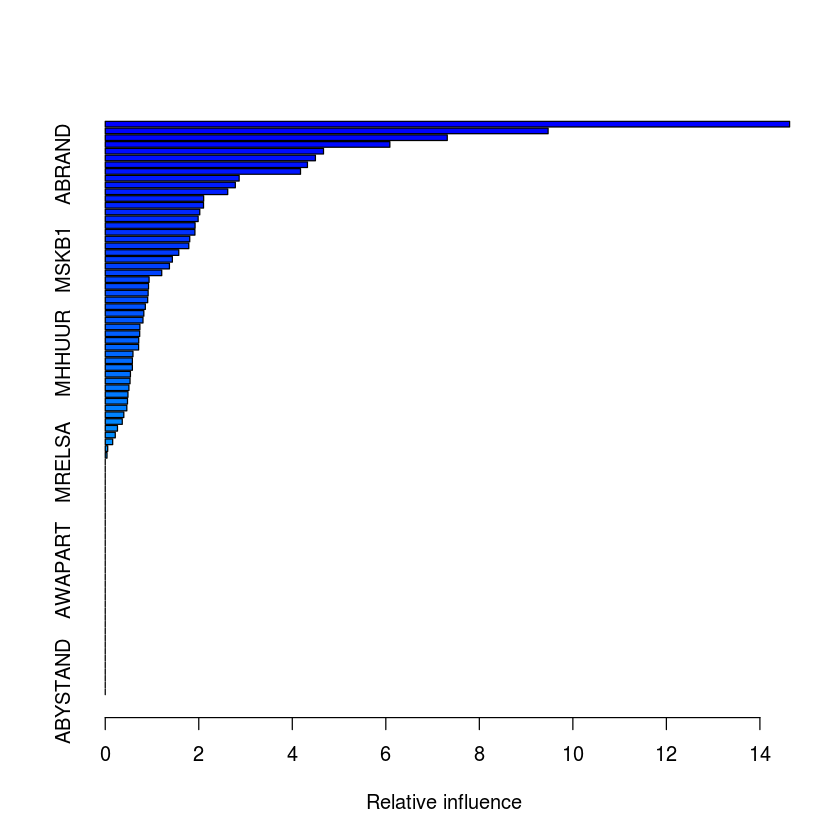

In [34]:
Caravan$Purchase01 = rep(0,length(Caravan$Purchase))
Caravan$Purchase01[Caravan$Purchase == 'Yes']<- 1
set.seed(1)
boost.caravan <- gbm(Purchase01~.-Purchase , data = Caravan[train,],distribution = "bernoulli", n.trees = 1000, shrinkage = 0.01)
summary(boost.caravan)


Vemos que las variables mas significativas son PPERSAUT y MKOOPKLA.

c) Ahora calculamos la matriz de confusion, asumiendo que la compra se da si tiene una probabilidad mayor a 0.2.

In [35]:
yhat.boost = predict(boost.caravan, newdata = Caravan[-train,],n.trees = 1000, type = "response")
yhat.pred = rep('No',length(Caravan$Purchase[-train]))
yhat.pred[yhat.boost>0.2]= 'Yes'
table(Caravan$Purchase[-train],yhat.pred)

     yhat.pred
        No  Yes
  No  4410  123
  Yes  256   33

Vemos que el porcentaje de gente que compro el producto dentro de la poblacion de gente que se predijo compraria el producto fue de 33/(123+33)= 21.1%. El error de prediccion del modelo es igual a (256+123)/4822 = 7.8%.

Por otra parte, se uso el metodo de regresion logistica para compararlo con boosting.

In [36]:
caravan.logist = glm(Purchase01~.-Purchase, family="binomial", data = Caravan, subset = train)
yhat.prob = predict(caravan.logist, data = Caravan[-train])
yhat.pred = rep('No',length(Caravan$Purchase[-train]))
yhat.pred[yhat.prob>0.2]= 'Yes'
table(Caravan$Purchase[-train],yhat.pred)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

     yhat.pred
        No  Yes
  No  4498   35
  Yes  284    5

En este caso obtenemos que la fraccion es igual a 5/(35+5) = 12.5%. Por otra parte tenemos que el error de prediccion es (284+35)/4822 = 6.6%. Comparando con el anterior modelo vemos que si bien el error de prediccion es menor, la cantidad de positivos que en efecto son positivos disminuye drasticamente. Por esa razon boosting es menor.